🎯 SD19 by_merge Dataset Testing Analysis - Local Version
📋 Classes: 47
   0-9: Digits
   10-35: Uppercase A-Z
   36-46: Lowercase a-k


🔹 Enter the path to your trained model:  /home/mudda/best_model_optimized_3.keras
🔹 Enter the path to the test dataset:  /home/mudda/by_merge
🔹 How many images to test? (default: 48):  1000



🔍 Checking if model file exists: /home/mudda/best_model_optimized_3.keras
✅ Model file found!

🔍 Checking if dataset directory exists: /home/mudda/by_merge
✅ Dataset directory found!

📂 Contents of /home/mudda/by_merge:
   📁 34/
   📁 4b_6b/
   📁 55_75/
   📁 56_76/
   📁 66/
   📁 53_73/
   📁 38/
   📁 65/
   📁 4e/
   📁 58_78/
   📁 36/
   📁 44/
   📁 35/
   📁 42/
   📁 74/
   📁 41/
   📁 68/
   📁 43_63/
   📁 64/
   📁 51/
   📁 4f_6f/
   📁 59_79/
   📁 47/
   📁 54/
   📁 4a_6a/
   📁 52/
   📁 57_77/
   📁 61/
   📁 4d_6d/
   📁 37/
   📁 62/
   📁 48/
   📁 32/
   📁 31/
   📁 30/
   📁 49_69/
   📁 4c_6c/
   📁 6e/
   📁 33/
   📁 50_70/
   📁 71/
   📁 39/
   📁 5a_7a/
   📁 72/
   📁 67/
   📁 46/
   📁 45/

📥 Loading model from: /home/mudda/best_model_optimized_3.keras
✅ Model loaded successfully from /home/mudda/best_model_optimized_3.keras
📊 Model input shape: (None, 128, 128, 1)
📊 Model output shape: (None, 47)
🔍 Analyzing SD19 by_merge dataset in: /home/mudda/by_merge
📁 Found 814255 images


Processing images: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.15it/s]



📈 Generating visualizations...


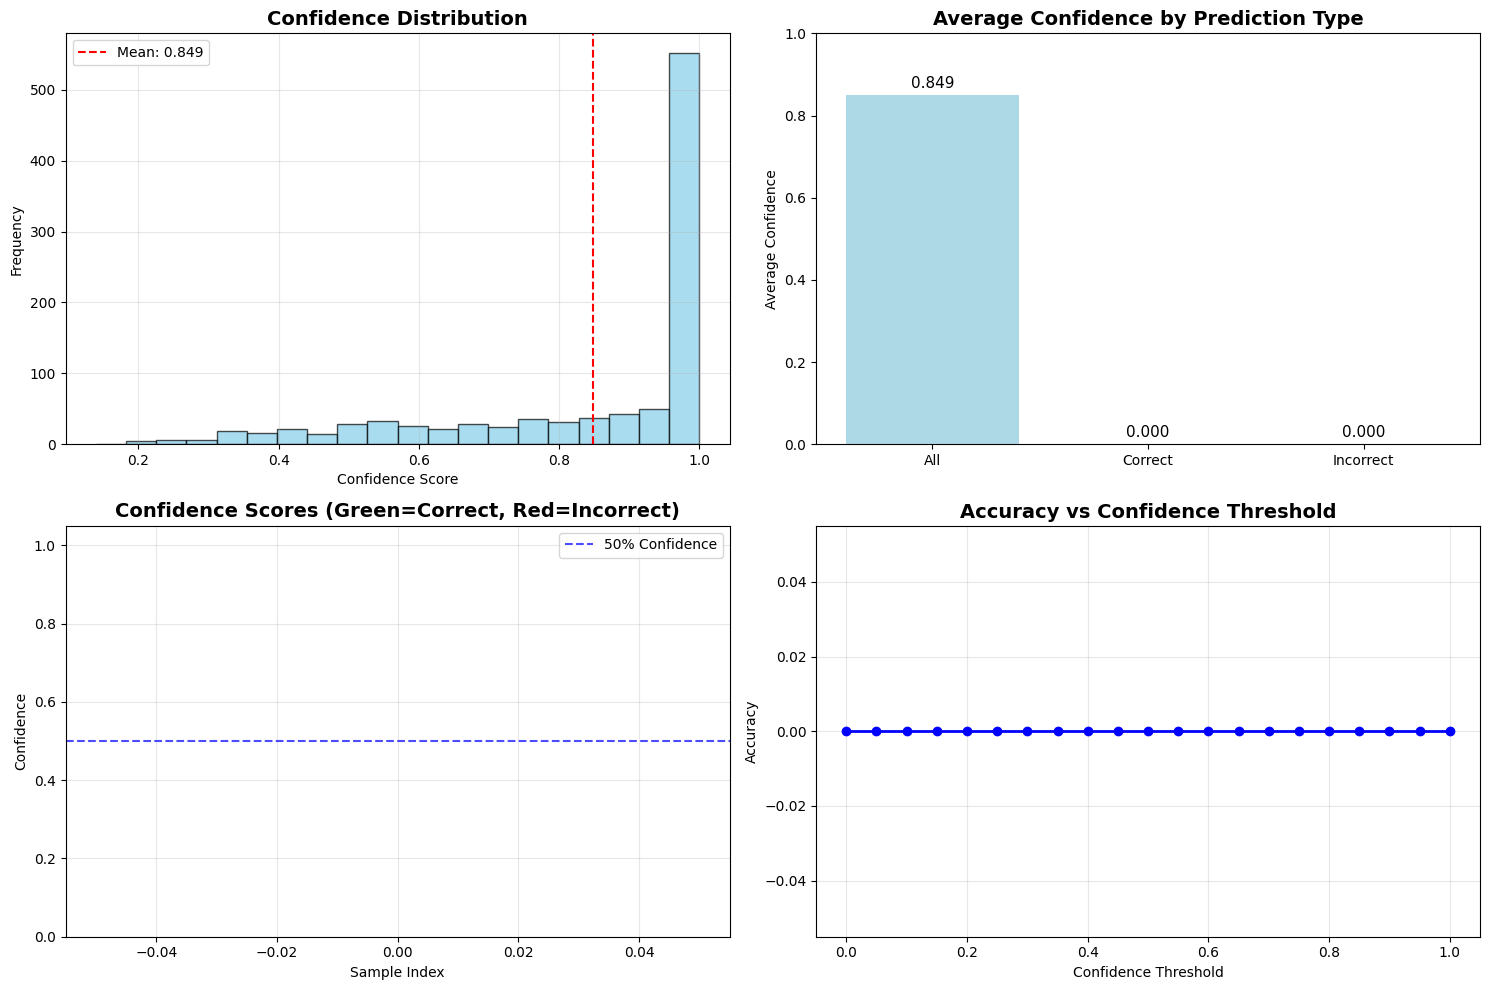


🔍 Example Predictions:
   ❓ 0 (conf: 0.418) - True: Unknown
   ❓ M (conf: 1.000) - True: Unknown
   ❓ 4 (conf: 0.997) - True: Unknown
   ❓ 4 (conf: 1.000) - True: Unknown
   ❓ S (conf: 0.771) - True: Unknown
   ❓ D (conf: 1.000) - True: Unknown
   ❓ 5 (conf: 1.000) - True: Unknown
   ❓ 2 (conf: 0.999) - True: Unknown
   ❓ 1 (conf: 0.516) - True: Unknown
   ❓ 4 (conf: 1.000) - True: Unknown

🎉 Analysis complete! Check the generated PNG files for visualizations.


In [2]:
# -*- coding: utf-8 -*-
"""SD19_bymerge_Testing_Local.py

Local version of the SD19 by_merge testing script.
"""

# Install required packages (run this in your terminal first)
# pip install tensorflow matplotlib scikit-learn seaborn Pillow tqdm opencv-python

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from tqdm import tqdm
import random
import cv2

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# SD19 by_merge class mapping (47 classes)
SD19_CLASS_NAMES = [
    # Digits 0-9 (10 classes)
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',

    # Uppercase A-Z (26 classes) - classes 10-35
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z',

    # Lowercase a-k (11 classes) - classes 36-46
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k'
]

def load_model(model_path):
    """Load the trained model with error handling"""
    try:
        model = keras.models.load_model(model_path)
        print(f"✅ Model loaded successfully from {model_path}")
        print(f"📊 Model input shape: {model.input_shape}")
        print(f"📊 Model output shape: {model.output_shape}")
        return model
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None

def load_and_preprocess_image(image_path, img_size=(128, 128), invert=True):
    """Load and preprocess a single image for SD19 dataset"""
    try:
        # Load image in grayscale
        img = Image.open(image_path).convert('L')

        # Resize to match model's expected input
        img = img.resize(img_size)

        # Convert to numpy array
        img_array = np.array(img, dtype=np.float32)

        # Normalize pixel values to [0, 1]
        img_array = img_array / 255.0

        # Invert if needed (SD19 images are often white on black)
        if invert:
            img_array = 1.0 - img_array

        # Add batch and channel dimensions
        img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
        img_array = np.expand_dims(img_array, axis=0)   # Add batch dimension

        return img_array
    except Exception as e:
        print(f"❌ Error loading image {image_path}: {e}")
        return None

def predict_on_image(model, image_path, class_names):
    """Make prediction on a single image"""
    processed_image = load_and_preprocess_image(image_path)
    if processed_image is None:
        return None, None, None

    # Make prediction
    predictions = model.predict(processed_image, verbose=0)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    all_probs = predictions[0]

    return predicted_class, confidence, all_probs

def get_actual_class_from_path(image_path, class_names):
    """Extract actual class from image path for SD19 dataset"""
    try:
        # Get folder name (which should be the class label)
        folder_name = os.path.basename(os.path.dirname(image_path))

        # Check if folder name is a direct match
        if folder_name in class_names:
            return class_names.index(folder_name), folder_name

        # Check if folder name is a number that corresponds to class index
        if folder_name.isdigit():
            class_idx = int(folder_name)
            if 0 <= class_idx < len(class_names):
                return class_idx, class_names[class_idx]

        # Handle cases where folder name might be a class name with spaces or special chars
        folder_name_lower = folder_name.lower()
        for i, class_name in enumerate(class_names):
            if folder_name_lower == class_name.lower():
                return i, class_name

        return None, "Unknown"
    except:
        return None, "Unknown"

def analyze_sd19_dataset(model, test_dir, class_names, num_samples=50):
    """Comprehensive analysis of SD19 by_merge dataset"""
    print(f"🔍 Analyzing SD19 by_merge dataset in: {test_dir}")

    # Get all image paths
    image_extensions = ['.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif']
    image_paths = []

    for root, _, files in os.walk(test_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_paths.append(os.path.join(root, file))

    if not image_paths:
        print("❌ No images found in the directory")
        return None, None

    print(f"📁 Found {len(image_paths)} images")

    # Select samples for analysis
    if len(image_paths) > num_samples:
        selected_paths = random.sample(image_paths, num_samples)
    else:
        selected_paths = image_paths

    # Collect predictions
    results = []
    for image_path in tqdm(selected_paths, desc="Processing images"):
        actual_idx, actual_label = get_actual_class_from_path(image_path, class_names)
        pred_class, confidence, all_probs = predict_on_image(model, image_path, class_names)

        if pred_class is not None:
            pred_label = class_names[pred_class] if pred_class < len(class_names) else f"Unknown({pred_class})"
            results.append({
                'image_path': image_path,
                'actual_idx': actual_idx,
                'actual_label': actual_label,
                'predicted_idx': pred_class,
                'predicted_label': pred_label,
                'confidence': confidence,
                'correct': actual_idx == pred_class if actual_idx is not None else None
            })

    return results, selected_paths

def plot_predictions_grid(results, class_names, num_cols=6):
    """Plot grid of predictions with actual vs predicted labels"""
    num_images = len(results)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(20, 3 * num_rows))
    plt.suptitle('SD19 by_merge - Model Predictions\n(Green: Correct, Red: Incorrect, Black: Unknown true label)',
                 fontsize=16, y=0.98)

    for i, result in enumerate(results):
        plt.subplot(num_rows, num_cols, i + 1)

        # Load and display image
        try:
            img = Image.open(result['image_path']).convert('L')
            img = img.resize((128, 128))
            plt.imshow(img, cmap='gray')
        except:
            plt.text(0.5, 0.5, 'Image load error', ha='center', va='center')

        # Determine title color
        if result['actual_label'] == "Unknown":
            title_color = 'black'
            title_text = f'Pred: {result["predicted_label"]}\nConf: {result["confidence"]:.3f}'
        else:
            title_color = 'green' if result['correct'] else 'red'
            title_text = f'True: {result["actual_label"]}\nPred: {result["predicted_label"]}\nConf: {result["confidence"]:.3f}'

        plt.title(title_text, color=title_color, fontsize=9, pad=5)
        plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.savefig('predictions_grid.png')
    plt.show()

def plot_confusion_matrix(results, class_names):
    """Plot confusion matrix for known labels"""
    # Filter results with known actual labels
    known_results = [r for r in results if r['actual_idx'] is not None and r['predicted_idx'] is not None]

    if not known_results:
        print("❌ No known labels for confusion matrix")
        return

    actuals = [r['actual_idx'] for r in known_results]
    predictions = [r['predicted_idx'] for r in known_results]

    # Create confusion matrix
    cm = confusion_matrix(actuals, predictions, labels=range(len(class_names)))

    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix - SD19 by_merge Dataset', fontsize=16, pad=20)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('Actual Labels', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()

    # Print classification report
    print("\n📊 Classification Report:")
    print(classification_report(actuals, predictions,
                               target_names=class_names, zero_division=0))

def plot_confidence_analysis(results):
    """Plot confidence analysis"""
    confidences = [r['confidence'] for r in results if r['confidence'] is not None]
    correct_confidences = [r['confidence'] for r in results if r.get('correct')]
    incorrect_confidences = [r['confidence'] for r in results if r.get('correct') == False]

    plt.figure(figsize=(15, 10))

    # 1. Confidence distribution
    plt.subplot(2, 2, 1)
    plt.hist(confidences, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(np.mean(confidences), color='red', linestyle='--',
                label=f'Mean: {np.mean(confidences):.3f}')
    plt.title('Confidence Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)

    # 2. Confidence by correctness
    plt.subplot(2, 2, 2)
    categories = ['All', 'Correct', 'Incorrect']
    means = [
        np.mean(confidences) if confidences else 0,
        np.mean(correct_confidences) if correct_confidences else 0,
        np.mean(incorrect_confidences) if incorrect_confidences else 0
    ]

    bars = plt.bar(categories, means, color=['lightblue', 'lightgreen', 'lightcoral'])
    plt.title('Average Confidence by Prediction Type', fontsize=14, fontweight='bold')
    plt.ylabel('Average Confidence')
    plt.ylim(0, 1)

    for bar, value in zip(bars, means):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=11)

    # 3. Confidence scatter plot
    plt.subplot(2, 2, 3)
    colors = ['green' if r.get('correct') else 'red' for r in results if r.get('correct') is not None]
    valid_results = [r for r in results if r.get('correct') is not None]
    plt.scatter(range(len(valid_results)), [r['confidence'] for r in valid_results],
                c=colors, alpha=0.6, s=50)
    plt.axhline(y=0.5, color='blue', linestyle='--', alpha=0.7, label='50% Confidence')
    plt.title('Confidence Scores (Green=Correct, Red=Incorrect)', fontsize=14, fontweight='bold')
    plt.xlabel('Sample Index')
    plt.ylabel('Confidence')
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(alpha=0.3)

    # 4. Accuracy vs Confidence threshold
    plt.subplot(2, 2, 4)
    thresholds = np.linspace(0, 1, 21)
    accuracies = []
    for threshold in thresholds:
        high_conf_results = [r for r in results if r['confidence'] >= threshold and r.get('correct') is not None]
        if high_conf_results:
            accuracy = sum(1 for r in high_conf_results if r['correct']) / len(high_conf_results)
            accuracies.append(accuracy)
        else:
            accuracies.append(0)

    plt.plot(thresholds, accuracies, 'b-', marker='o', linewidth=2)
    plt.title('Accuracy vs Confidence Threshold', fontsize=14, fontweight='bold')
    plt.xlabel('Confidence Threshold')
    plt.ylabel('Accuracy')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('confidence_analysis.png')
    plt.show()

def plot_class_performance(results, class_names):
    """Plot performance by class"""
    known_results = [r for r in results if r['actual_idx'] is not None and r.get('correct') is not None]

    if not known_results:
        return

    # Calculate accuracy per class
    class_stats = {}
    for class_idx in range(len(class_names)):
        class_results = [r for r in known_results if r['actual_idx'] == class_idx]
        if class_results:
            accuracy = sum(1 for r in class_results if r['correct']) / len(class_results)
            class_stats[class_idx] = {
                'accuracy': accuracy,
                'count': len(class_results),
                'class_name': class_names[class_idx]
            }

    # Sort by accuracy
    sorted_stats = sorted(class_stats.items(), key=lambda x: x[1]['accuracy'])

    plt.figure(figsize=(15, 8))
    classes = [f"{stats['class_name']}\n(n={stats['count']})" for _, stats in sorted_stats]
    accuracies = [stats['accuracy'] for _, stats in sorted_stats]

    colors = ['green' if acc >= 0.7 else 'orange' if acc >= 0.4 else 'red' for acc in accuracies]

    bars = plt.barh(range(len(classes)), accuracies, color=colors)
    plt.yticks(range(len(classes)), classes)
    plt.title('Accuracy by Class', fontsize=16, fontweight='bold')
    plt.xlabel('Accuracy')
    plt.xlim(0, 1)

    for i, (bar, acc) in enumerate(zip(bars, accuracies)):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f'{acc:.3f}', ha='left', va='center', fontsize=9)

    plt.tight_layout()
    plt.savefig('class_performance.png')
    plt.show()

def list_files_in_directory(directory):
    """List files in a directory"""
    if not os.path.exists(directory):
        print(f"❌ Directory not found: {directory}")
        return

    print(f"\n📂 Contents of {directory}:")
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            print(f"   📁 {item}/")
        else:
            print(f"   📄 {item}")

def main():
    print("🎯 SD19 by_merge Dataset Testing Analysis - Local Version")
    print("=" * 60)
    print(f"📋 Classes: {len(SD19_CLASS_NAMES)}")
    print(f"   0-9: Digits")
    print(f"   10-35: Uppercase A-Z")
    print(f"   36-46: Lowercase a-k")
    print("=" * 60)

    # Get model path from user
    model_path = input("🔹 Enter the path to your trained model: ").strip().strip('"')
    if not model_path:
        model_path = "best_model_optimized_2.keras"  # Default model name
        print(f"Using default model path: {model_path}")

    # Get test directory from user
    test_dir = input("🔹 Enter the path to the test dataset: ").strip().strip('"')
    if not test_dir:
        test_dir = "by_merge"  # Default dataset directory
        print(f"Using default dataset path: {test_dir}")

    # Number of samples to test
    try:
        num_samples = int(input("🔹 How many images to test? (default: 48): ") or "48")
    except:
        num_samples = 48

    # Check if files exist
    print(f"\n🔍 Checking if model file exists: {model_path}")
    if os.path.exists(model_path):
        print("✅ Model file found!")
    else:
        print("❌ Model file not found. Please check the path.")
        # List available files in current directory
        list_files_in_directory(".")
        return

    print(f"\n🔍 Checking if dataset directory exists: {test_dir}")
    if os.path.exists(test_dir):
        print("✅ Dataset directory found!")
        # Show dataset structure
        list_files_in_directory(test_dir)
    else:
        print("❌ Dataset directory not found. Please check the path.")
        return

    # Load model
    print(f"\n📥 Loading model from: {model_path}")
    model = load_model(model_path)
    if model is None:
        return

    # Analyze dataset
    results, image_paths = analyze_sd19_dataset(model, test_dir, SD19_CLASS_NAMES, num_samples=num_samples)

    if not results:
        print("❌ No results to analyze")
        return

    # Calculate overall statistics
    known_results = [r for r in results if r.get('correct') is not None]
    if known_results:
        accuracy = sum(1 for r in known_results if r['correct']) / len(known_results)
        avg_confidence = np.mean([r['confidence'] for r in results])

        print(f"\n📊 Overall Statistics:")
        print(f"   ✅ Accuracy: {accuracy:.3f} ({sum(1 for r in known_results if r['correct'])}/{len(known_results)} correct)")
        print(f"   🎯 Average Confidence: {avg_confidence:.3f}")
        if any(r['correct'] for r in known_results):
            print(f"   📈 Correct predictions confidence: {np.mean([r['confidence'] for r in known_results if r['correct']]):.3f}")
        if any(not r['correct'] for r in known_results):
            print(f"   📉 Incorrect predictions confidence: {np.mean([r['confidence'] for r in known_results if not r['correct']]):.3f}")

    # Plot results
    print("\n📈 Generating visualizations...")

    # 1. Prediction grid
    plot_predictions_grid(results, SD19_CLASS_NAMES)

    # 2. Confusion matrix (if we have known labels)
    if any(r['actual_idx'] is not None for r in results):
        plot_confusion_matrix(results, SD19_CLASS_NAMES)

    # 3. Confidence analysis
    plot_confidence_analysis(results)

    # 4. Class performance
    plot_class_performance(results, SD19_CLASS_NAMES)

    # Show some example predictions
    print("\n🔍 Example Predictions:")
    for i, result in enumerate(results[:10]):
        status = "✅" if result.get('correct') else "❌" if result.get('correct') == False else "❓"
        print(f"   {status} {result['predicted_label']} (conf: {result['confidence']:.3f}) - True: {result['actual_label']}")

    print("\n🎉 Analysis complete! Check the generated PNG files for visualizations.")

# Run the main function
if __name__ == "__main__":
    main()